Epoch 1/10
938/938 [==============================] - 33s 35ms/step - loss: 0.6847 - accuracy: 0.8341 - val_loss: 0.3423 - val_accuracy: 0.9048
Epoch 2/10
938/938 [==============================] - 24s 25ms/step - loss: 0.3407 - accuracy: 0.9016 - val_loss: 0.3037 - val_accuracy: 0.9134
Epoch 3/10
938/938 [==============================] - 22s 24ms/step - loss: 0.3134 - accuracy: 0.9087 - val_loss: 0.2861 - val_accuracy: 0.9191
Epoch 4/10
938/938 [==============================] - 23s 25ms/step - loss: 0.2970 - accuracy: 0.9141 - val_loss: 0.2781 - val_accuracy: 0.9217
Epoch 5/10
938/938 [==============================] - 24s 26ms/step - loss: 0.2834 - accuracy: 0.9183 - val_loss: 0.2641 - val_accuracy: 0.9248
Epoch 6/10
938/938 [==============================] - 22s 24ms/step - loss: 0.2720 - accuracy: 0.9215 - val_loss: 0.2543 - val_accuracy: 0.9287
Epoch 7/10
938/938 [==============================] - 21s 23ms/step - loss: 0.2604 - accuracy: 0.9256 - val_loss: 0.2379 - val_accuracy:

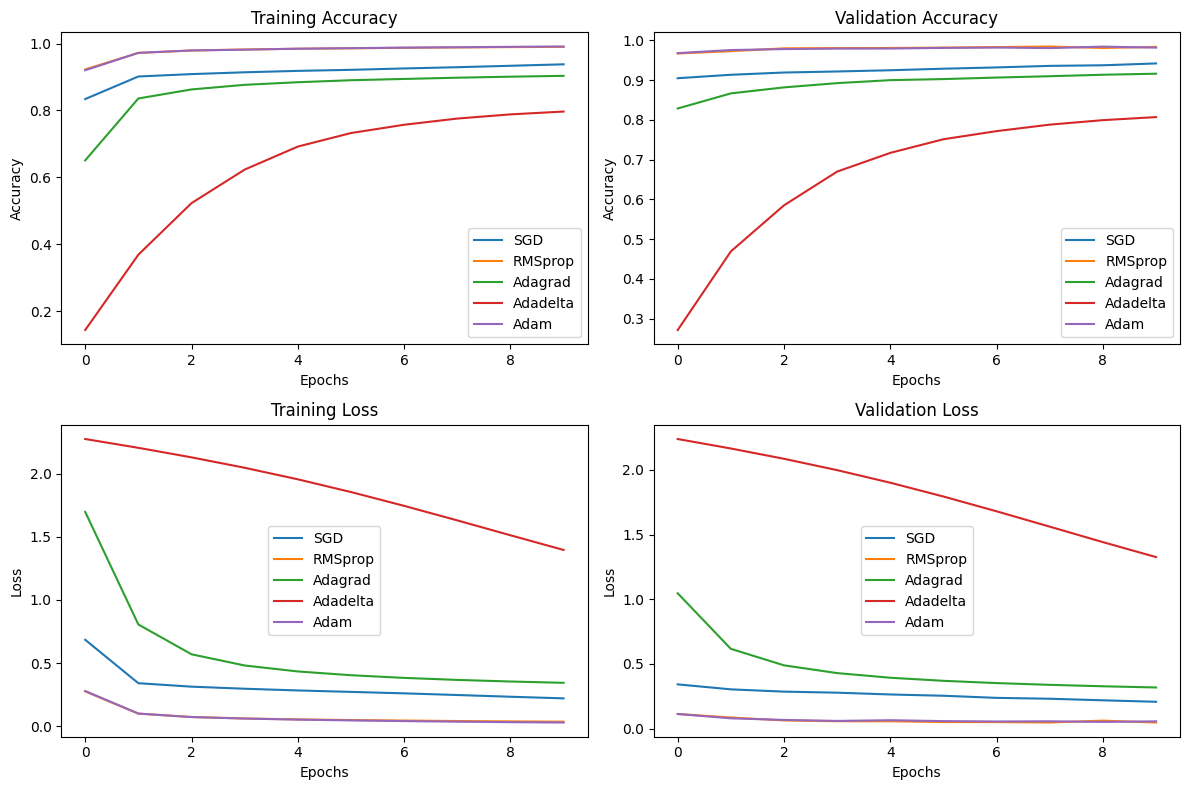

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define a simple convolutional neural network model
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model for each optimizer
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']
history_dict = {}

for optimizer_name in optimizers:
    model = create_model(optimizer_name)
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))
    history_dict[optimizer_name] = history.history

# Plot the results
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 2, 1)
for optimizer_name, history in history_dict.items():
    plt.plot(history['accuracy'], label=optimizer_name)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(2, 2, 2)
for optimizer_name, history in history_dict.items():
    plt.plot(history['val_accuracy'], label=optimizer_name)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(2, 2, 3)
for optimizer_name, history in history_dict.items():
    plt.plot(history['loss'], label=optimizer_name)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss
plt.subplot(2, 2, 4)
for optimizer_name, history in history_dict.items():
    plt.plot(history['val_loss'], label=optimizer_name)
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
